In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [3]:
# for somalocation
df_columns_area = pd.read_csv("log2fc_somalocation.csv",index_col=0)

In [21]:
df_columns_area_plot = df_columns_area.pivot_table(columns="cluster",index="gene",values="avg_log2FC",aggfunc="mean").fillna(0)
df_columns_area_pvalue = df_columns_area.pivot_table(columns="cluster",index="gene",values="p_val_adj",aggfunc="mean").fillna(1)

In [14]:
domain_area = ['VMH','LPO','ZI','ARH','MBO','AHN','DMH','MPN','PVHd','MPO','PVH','LHA','PH']

In [22]:
domain_index = ["PAGpl","PAGcl","PAGpm"]
df_columns_area_plot = df_columns_area_plot.loc[["posterior.lateral.PAG","central.lateral.PAG","posterior.medial.PAG"],:]
df_columns_area_plot.index = domain_index
df_columns_area_plot = df_columns_area_plot[domain_area]

In [23]:
df_columns_area_pvalue = df_columns_area_pvalue.loc[["posterior.lateral.PAG","central.lateral.PAG","posterior.medial.PAG"],:]
df_columns_area_pvalue.index = domain_index
df_columns_area_pvalue = df_columns_area_pvalue[domain_area]

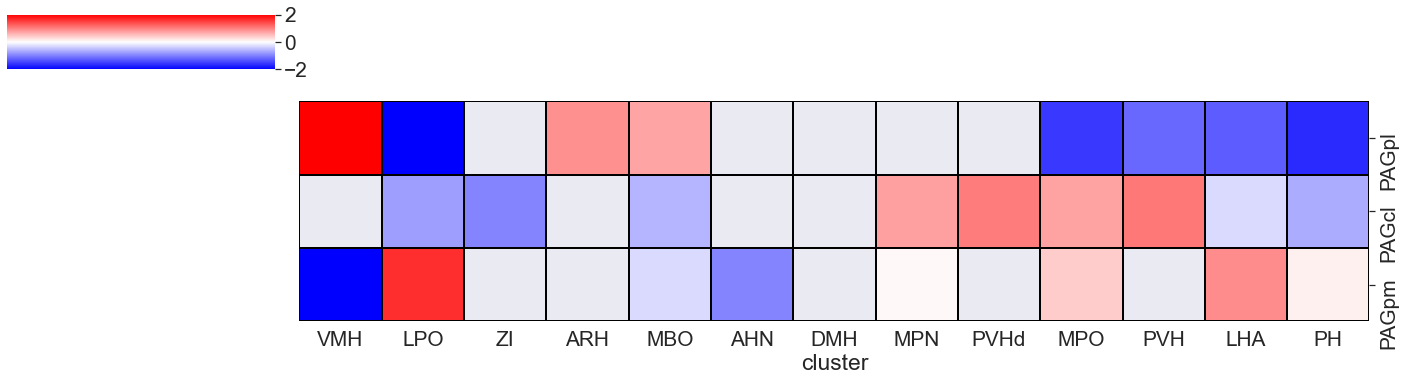

In [24]:
# fig, ax = plt.subplots(figsize = (20,13))
sns.set(font_scale=1.9)
sns.clustermap(data = df_columns_area_plot,cmap="bwr",vmin=-2,
                 vmax=2,linewidths=2, linecolor='black',annot=False,fmt="g",
                  mask = df_columns_area_pvalue>0.05,row_cluster=False,col_cluster=False,
                  figsize = (20,6)
                 )
plt.tight_layout()
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_somalocation.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_somalocation.jpg",dpi =600,format="jpg")